https://courses.edx.org/courses/course-v1:MITx+15.071x_3+1T2016/courseware/5abd4e9833ed47b2b4eae8827f83d516/aa754f6d17194f3b8a29ec37b8a7f32a/


Visualizing Network Data

The cliche goes that the world is an increasingly interconnected place, and the connections between different entities are often best represented with a graph. Graphs are comprised of vertices (also often called "nodes") and edges connecting those nodes. In this assignment, we will learn how to visualize networks using the igraph package in R.

For this assignment, we will visualize social networking data using anonymized data from Facebook; this data was originally curated in a recent paper about computing social circles in social networks. In our visualizations, the vertices in our network will represent Facebook users and the edges will represent these users being Facebook friends with each other.

The first file we will use, edges.csv, contains variables V1 and V2, which label the endpoints of edges in our network. Each row represents a pair of users in our graph who are Facebook friends. For a pair of friends A and B, edges.csv will only contain a single row -- the smaller identifier will be listed first in this row. From this row, we will know that A is friends with B and B is friends with A.

The second file, users.csv, contains information about the Facebook users, who are the vertices in our network. This file contains the following variables:

id: A unique identifier for this user; this is the value that appears in the rows of edges.csv

gender: An identifier for the gender of a user taking the values A and B. Because the data is anonymized, we don't know which value refers to males and which value refers to females.

school: An identifier for the school the user attended taking the values A and AB (users with AB attended school A as well as another school B). Because the data is anonymized, we don't know the schools represented by A and B.

locale: An identifier for the locale of the user taking the values A and B. Because the data is anonymized, we don't know which value refers to what locale.


In [1]:
edges = read.csv("edges.csv")

In [2]:
users = read.csv("users.csv")

In [4]:
str(users)

'data.frame':	59 obs. of  4 variables:
 $ id    : int  3981 3982 3983 3984 3985 3986 3987 3988 3989 3990 ...
 $ gender: Factor w/ 3 levels "","A","B": 2 3 3 3 3 3 2 3 3 2 ...
 $ school: Factor w/ 3 levels "","A","AB": 2 1 1 1 1 2 1 1 2 1 ...
 $ locale: Factor w/ 3 levels "","A","B": 3 3 3 3 3 3 2 3 3 2 ...


In [5]:
str(edges)

'data.frame':	146 obs. of  2 variables:
 $ V1: int  4019 4023 4023 4027 3988 3982 3994 3998 3993 3982 ...
 $ V2: int  4026 4031 4030 4032 4021 3986 3998 3999 3995 4021 ...


In [9]:
summary(users)

       id       gender school  locale
 Min.   : 594    : 2     :40    : 3  
 1st Qu.:3994   A:15   A :17   A: 6  
 Median :4009   B:42   AB: 2   B:50  
 Mean   :3952                        
 3rd Qu.:4024                        
 Max.   :4038                        

In [8]:
292/59

[1] 4.949153

In [10]:
table(users$school,users$locale)

    
         A  B
      3  6 31
  A   0  0 17
  AB  0  0  2

In [11]:
table(users$school,users$gender)

    
         A  B
      1 11 28
  A   1  3 13
  AB  0  1  1

In [12]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [13]:
?graph.data.frame

as_data_frame {igraph},R Documentation
x,An igraph object.
what,"Character constant, whether to return info about vertices, edges, or both. The default is ‘edges’."
d,A data frame containing a symbolic edge list in the first two columns. Additional columns are considered as edge attributes. Since version 0.7 this argument is coerced to a data frame with as.data.frame.
directed,"Logical scalar, whether or not to create a directed graph."
vertices,"A data frame with vertex metadata, or NULL. See details below. Since version 0.7 this argument is coerced to a data frame with as.data.frame, if not NULL."
...,Passed to graph_from_data_frame.


In [14]:
g = graph.data.frame(edges, FALSE, users) 

In [15]:
str(g)

IGRAPH UN-- 59 146 -- 
+ attr: name (v/c), gender (v/c), school (v/c), locale (v/c)
+ edges (vertex names):
3981 -- 3994, 3997, 3998, 4009, 4018, 4019, 4023
3982 -- 3986, 3988, 3994, 3997, 3998, 4003, 4009, 4014, 4021, 4023,
        4026, 4030, 4037
3983 -- 4017
3984 --
3985 -- 3988, 3993, 3995, 4004, 4014
3986 -- 3982, 4000, 4014, 4017, 4021, 4026, 4030, 4033
3987 -- 4012
3988 -- 3982, 3985, 3993, 3995, 4021, 4030
3989 -- 3991, 594, 4011, 4013, 4038
3990 -- 4007, 4016, 4025
3991 -- 3989, 4031
3992 -- 4000, 4017
3993 -- 3985, 3988, 3995, 4004, 4030
3994 -- 3981, 3982, 3996, 3997, 3998, 4009, 4018, 4019, 4023, 4030
3995 -- 3985, 3988, 3993, 4000, 4004, 4014, 4023, 4026
594 -- 3989, 4011, 4031
3996 -- 3994, 4002, 4028
3997 -- 3981, 3982, 3994, 3998, 4009, 4018, 4019, 4021, 4023, 4030
3998 -- 3981, 3982, 3994, 3997, 3999, 4002, 4005, 4009, 4014, 4018,
        4019, 4021, 4023
3999 -- 3998, 4005, 4036
4000 -- 3986, 3992, 3995, 4017, 4021, 4026, 4030, 4033
4001 -- 4029
4002 -- 3996, 3998, 4

Now, we want to plot our graph. By default, the vertices are large and have text labels of a user's identifier. Because this would clutter the output, we will plot with no text labels and smaller vertices:

plot(g, vertex.size=5, vertex.label=NA)

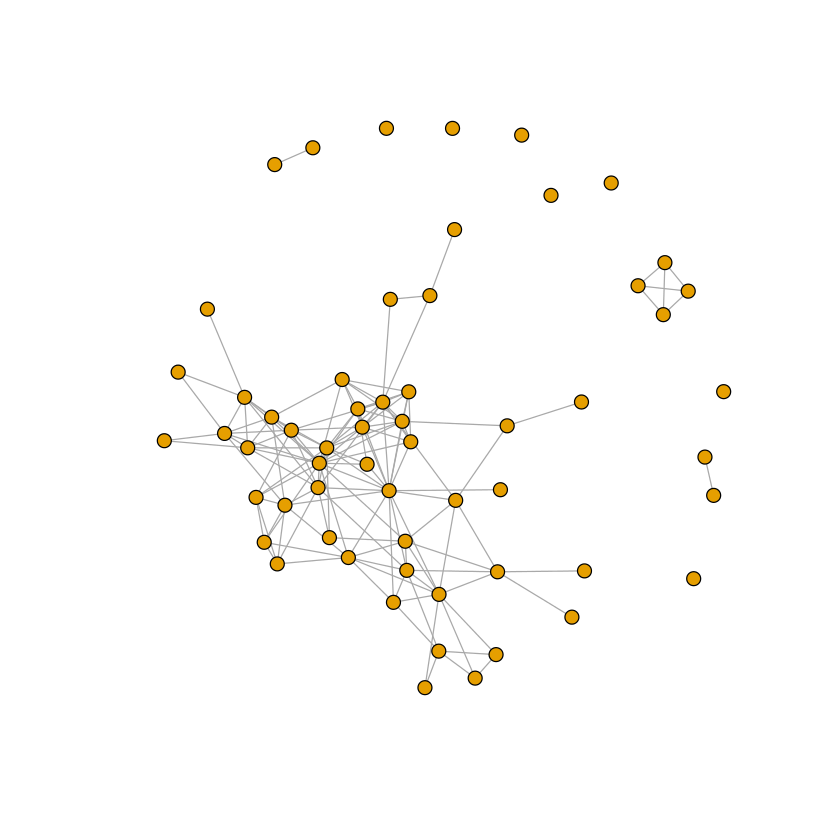

In [16]:
plot(g, vertex.size=5, vertex.label=NA)

In [18]:
sort(degree(g),decreasing = TRUE)

4030 4023 3982 3998 4014 3994 3997 4021 4031 4004 4009 3986 3995 4000 4017 4026 
  18   17   13   13   11   10   10   10   10    9    9    8    8    8    8    8 
4038 3981 4019 4020 3988 4002 4018 4027 3985 3989 3993 4013 4003 3990  594 3996 
   8    7    7    7    6    6    6    6    5    5    5    5    4    3    3    3 
3999 4007 4011 4016 4025 4037 3991 3992 4005 4033 3983 3987 4001 4006 4012 4028 
   3    3    3    3    3    3    2    2    2    2    1    1    1    1    1    1 
4029 4032 4034 4036 3984 4008 4010 4015 4022 4024 4035 
   1    1    1    1    0    0    0    0    0    0    0

In [19]:
V(g)$size = degree(g)/2+2

In [20]:
summary(V(g)$size)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.500   3.500   4.475   6.000  11.000 

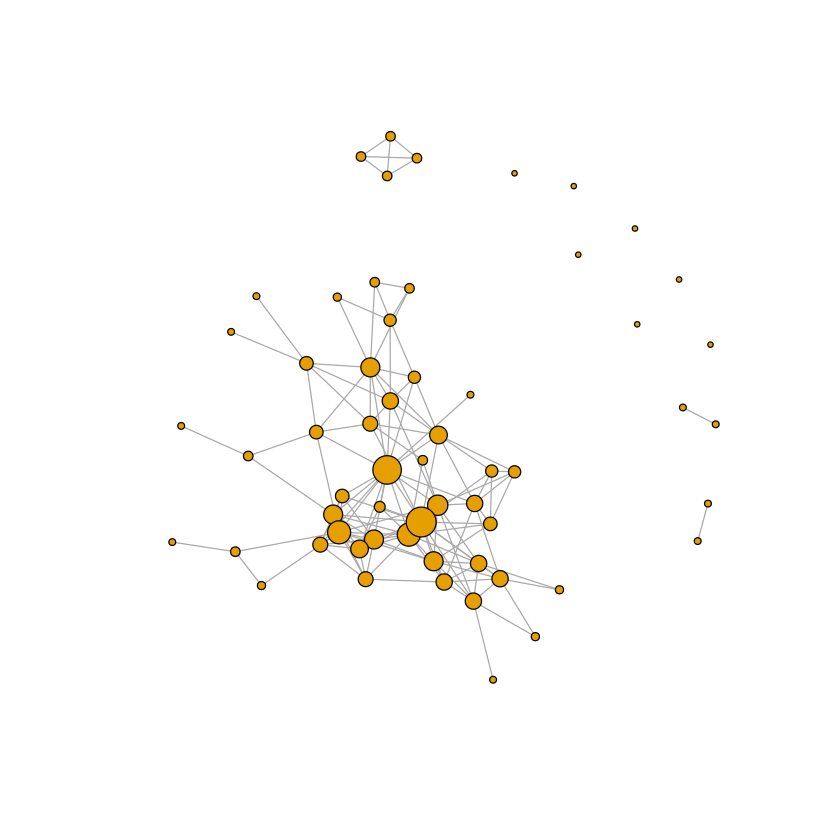

In [22]:
plot(g,vertex.label = NA)

In [23]:
V(g)$color = "black"

In [24]:
V(g)$color[]

[1] "black" "black" "black" "black" "black" "black" "black" "black" "black"
[10] "black" "black" "black" "black" "black" "black" "black" "black" "black"
[19] "black" "black" "black" "black" "black" "black" "black" "black" "black"
[28] "black" "black" "black" "black" "black" "black" "black" "black" "black"
[37] "black" "black" "black" "black" "black" "black" "black" "black" "black"
[46] "black" "black" "black" "black" "black" "black" "black" "black" "black"
[55] "black" "black" "black" "black" "black"

In [26]:
V(g)$color[V(g)$gender == "A"] = "red"
V(g)$color[V(g)$gender == "B"] = "gray"

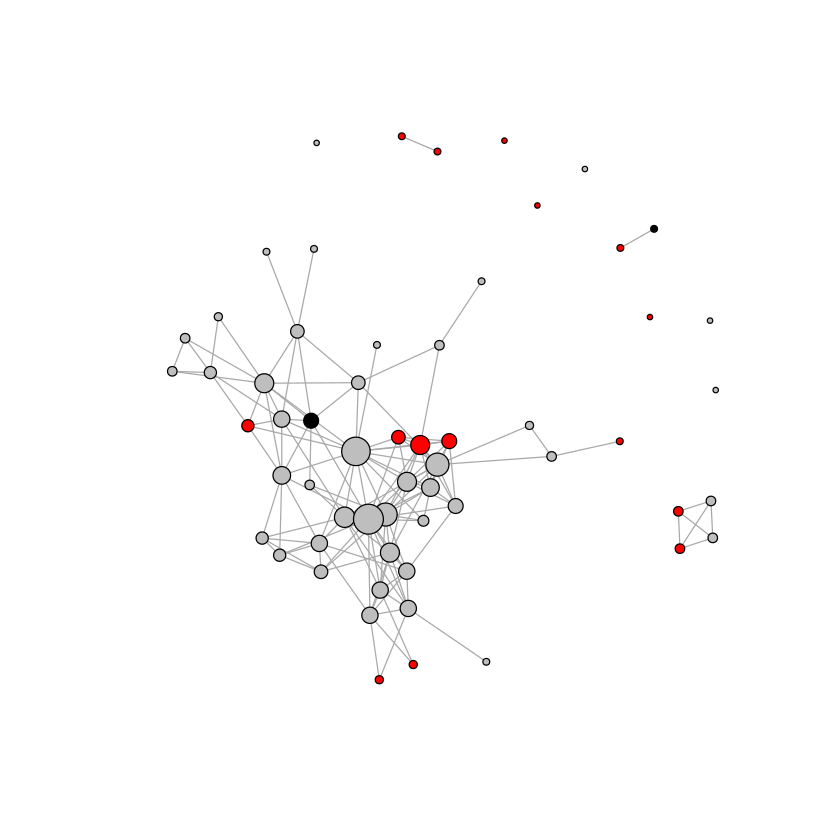

In [27]:
plot(g, vertex.label =NA)

In [28]:
V(g)$color = "black"
V(g)$color[V(g)$school == "A"] = "red"
V(g)$color[V(g)$school == "AB"] = "gray"

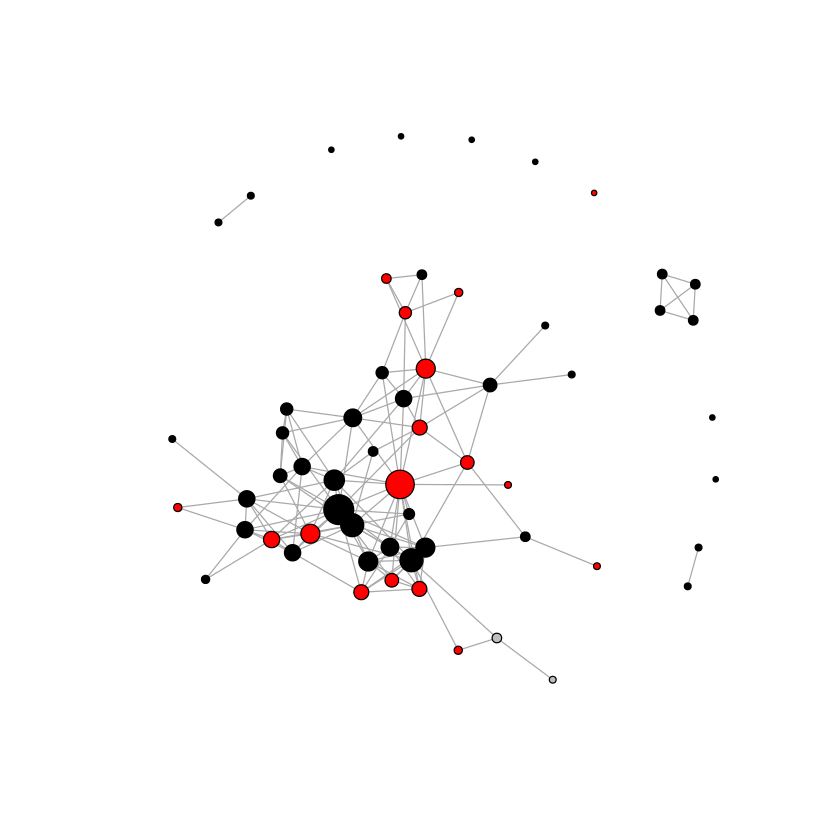

In [29]:
plot(g, vertex.label =NA)

In [30]:
V(g)$color = "black"
V(g)$color[V(g)$locale == "A"] = "red"
V(g)$color[V(g)$locale == "B"] = "gray"

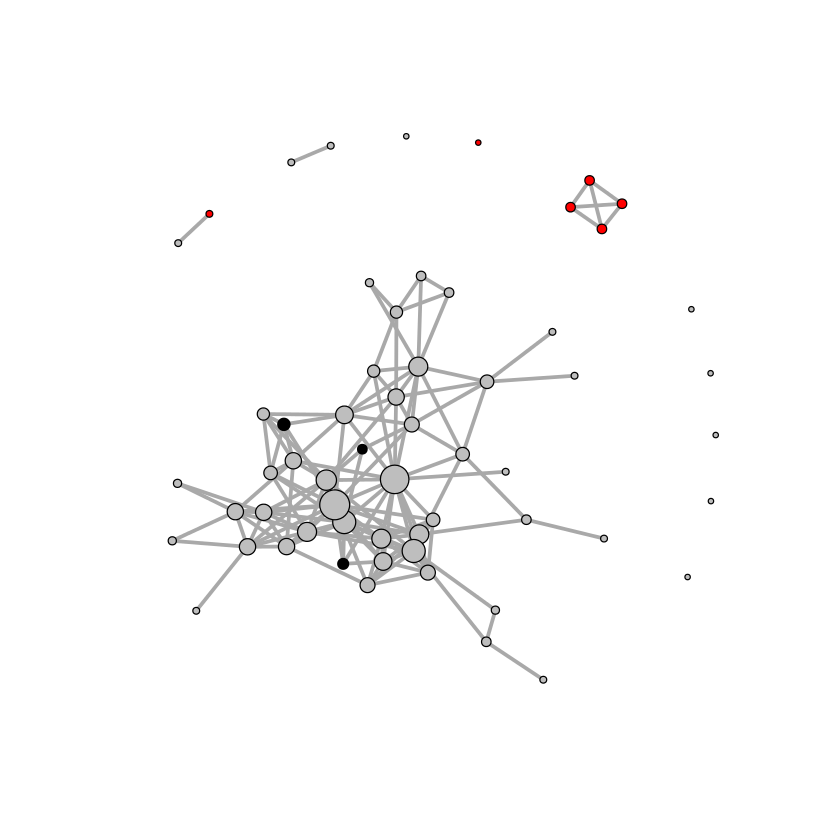

In [36]:
plot(g, vertex.label =NA, edge.width=3)

In [32]:
?igraph.plotting

Drawing graphs {igraph},R Documentation


In [33]:
?plot.igraph

plot.igraph {igraph},R Documentation
x,The graph to plot.
axes,"Logical, whether to plot axes, defaults to FALSE."
add,"Logical scalar, whether to add the plot to the current device, or delete the device's current contents first."
xlim,"The limits for the horizontal axis, it is unlikely that you want to modify this."
ylim,"The limits for the vertical axis, it is unlikely that you want to modify this."
mark.groups,"A list of vertex id vectors. It is interpreted as a set of vertex groups. Each vertex group is highlighted, by plotting a colored smoothed polygon around and “under” it. See the arguments below to control the look of the polygons."
mark.shape,"A numeric scalar or vector. Controls the smoothness of the vertex group marking polygons. This is basically the ‘shape’ parameter of the xspline function, its possible values are between -1 and 1. If it is a vector, then a different value is used for the different vertex groups."
mark.col,"A scalar or vector giving the colors of marking the polygons, in any format accepted by xspline; e.g. numeric color ids, symbolic color names, or colors in RGB."
mark.border,"A scalar or vector giving the colors of the borders of the vertex group marking polygons. If it is NA, then no border is drawn."
mark.expand,"A numeric scalar or vector, the size of the border around the marked vertex groups. It is in the same units as the vertex sizes. If a vector is given, then different values are used for the different vertex groups."
